In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import math
import statsmodels.api as sm
import matplotlib.style
import matplotlib as mpl
import seaborn as sns
from scipy import stats, ndimage, misc
import csv
from matplotlib.ticker import FormatStrFormatter
import opto_util as opto
mpl.style.use('classic')
%matplotlib inline

In [2]:
plt.rcParams.update({
    'font.sans-serif': 'arial',
    'font.family': 'sans-serif'
})

In [3]:
full_df=pd.read_csv('20210415_full_df.csv')

/Users/travish/opt/miniconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (5,24,56) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
intKclusters=pd.read_csv('interneuron_Kclusters_1203.csv')
full_df = pd.merge(full_df, intKclusters,  how='left', left_on=['exp_id','headstage'], right_on = ['experiment','headstage'])
full_df.Kcluster.unique()

array([ 1., nan,  0.,  2.])

In [7]:
Cs_internal=full_df[full_df.internal=='Cs']
standard_df=full_df[full_df.internal=='standard']
standard_df=standard_df[standard_df.notes.isnull()]


In [9]:
RorbAi167=standard_df[(standard_df.presynapticCre=='Rorb') & (standard_df.presynapticEffector=='Ai167')]
RorbKv=standard_df[(standard_df.presynapticCre=='Rorb') & (standard_df.presynapticEffector=='ChrimsonR_kv_eyfp_AAV')]
SstAi167=standard_df[(standard_df.presynapticCre=='Sst') & (standard_df.presynapticEffector=='Ai167')]
SstKv=standard_df[(standard_df.presynapticCre=='Sst') & (standard_df.presynapticEffector=='ChrimsonR_kv_eyfp_AAV')]
PvalbKv=standard_df[(standard_df.presynapticCre=='Pvalb') & (standard_df.presynapticEffector=='ChrimsonR_kv_eyfp_AAV')]
PenkKv=standard_df[(standard_df.presynapticCre=='Penk') & (standard_df.presynapticEffector=='ChrimsonR_kv_eyfp_AAV')]
Tlx3Kv=standard_df[(standard_df.presynapticCre=='Tlx3') & (standard_df.presynapticEffector=='ChrimsonR_kv_eyfp_AAV')]
Scnn1aAi167=standard_df[(standard_df.presynapticCre=='Scnn1a') & (standard_df.presynapticEffector=='Ai167')]

Sst=standard_df[standard_df.presynapticCre=='Sst']
Ntsr1=standard_df[standard_df.presynapticCre=='Ntsr1']
Rorb=standard_df[standard_df.presynapticCre=='Rorb']
Scnn1a=standard_df[standard_df.presynapticCre=='Scnn1a']
Sst=standard_df[standard_df.presynapticCre=='Sst']


exc_L23_pyr=standard_df[(standard_df.post_class=='pyramidal') & (standard_df.post_layer==2)]
exc_L23_pyr=exc_L23_pyr[exc_L23_pyr.presynapticCre.isin(['Penk', 'Scnn1a', 'Rorb', 'Tlx3', 'Ntsr1'])]
exc_L23_fsi=standard_df[(standard_df.Kcluster==1) & (standard_df.post_layer==2)]
exc_L23_fsi=exc_L23_fsi[exc_L23_fsi.presynapticCre.isin(['Penk', 'Scnn1a', 'Rorb', 'Tlx3', 'Ntsr1'])]



In [10]:
Penk_L23pyr=PenkKv[(PenkKv.post_class=='pyramidal') & (PenkKv.post_layer==2)]
Penk_L23int=PenkKv[(PenkKv.post_class=='interneuron') & (PenkKv.post_layer==2)]
Penk_L23fsi=PenkKv[(PenkKv.Kcluster==1) & (PenkKv.post_layer==2)]
Penk_L23vip=Penk_L23int[Penk_L23int.Kcluster==2]
Rorb_L23pyr=Rorb[(Rorb.post_class=='pyramidal') & (Rorb.post_layer==2)]
Rorb_L23fsi=Rorb[(Rorb.Kcluster==1) & (Rorb.post_layer==2)]
Tlx3_L23pyr=Tlx3Kv[(Tlx3Kv.post_class=='pyramidal') & (Tlx3Kv.post_layer==2)]
Tlx3_L23fsi=Tlx3Kv[(Tlx3Kv.Kcluster==1) & (Tlx3Kv.post_layer==2)]
Ntsr1_L23pyr=Ntsr1[(Ntsr1.post_class=='pyramidal') & (Ntsr1.post_layer==2)]
Scnn1a_L23pyr=Scnn1a[(Scnn1a.post_class=='pyramidal') & (Scnn1a.post_layer==2)]
Sst_L23pyr=Sst[(Sst.post_class=='pyramidal') & (Sst.post_layer==2)]
Sst_L5pyr=Sst[(Sst.post_class=='pyramidal') & (Sst.post_layer==5)]
Sst_IT=Sst_L5pyr[Sst_L5pyr.sag<0.15]
Sst_ET=Sst_L5pyr[Sst_L5pyr.sag>0.15]

Sst_L23fsi=Sst[(Sst.Kcluster==1) & (Sst.post_layer==2)]
Pvalb_L23pyr=PvalbKv[(PvalbKv.post_class=='pyramidal') & (PvalbKv.post_layer==2)]
Pvalb_Pvalb=PvalbKv[(PvalbKv.Kcluster==1) & (PvalbKv.post_layer==2)]

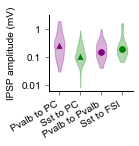

In [14]:
s=15
tick_size=4
fs=10
Pvalb_Pvalb_sub=Pvalb_Pvalb[Pvalb_Pvalb.xyz_dist>100] ##exclude Pvalb to Pvalb connections within 100 microns to avoid overlap of direct stim artifact with IPSP
df_list=[Pvalb_L23pyr,Sst_L23pyr,Pvalb_Pvalb_sub,Sst_L23fsi]
tick_labels=['Pvalb to PC', 'Sst to PC', 'Pvalb to Pvalb','Sst to FSI']
markers=['^','^','o','o',]
colors=['purple',  'green', 'purple','green']
colors2=['purple',  'green','purple', 'green']
fig, ax = plt.subplots()
master_dists=[]

for i in range(len(df_list)):
    df=df_list[i]
    df=df[df.cnx=='inhibitory']
    df=df.dropna(subset=['peakOfAvg'])
    y=np.array(df.peakOfAvg*-1)
    description=tick_labels[i]

    y=np.log10(y)
    x=np.random.normal(i,0.1, size=len(y))
    mark=markers[i]
    color=colors[i]
    color2=colors2[i]
    master_dists.append(y)
    
    ax.scatter(i+1,np.median(y),facecolor=color2,marker=mark,s=s*4,edgecolor='white')
violin_parts=ax.violinplot(master_dists,showmeans=False, showmedians=False,
        showextrema=False,points=1000)
i=0
for pc in violin_parts['bodies']:
    mark=markers[i]
    color=colors[i]
    pc.set_facecolor(color)
    pc.set_edgecolor(color)
    
    i+=1    
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_tick_params(size=tick_size,labelsize=fs, direction='out')
ax.xaxis.set_tick_params(size=tick_size,labelsize=fs, direction='out')
ax.yaxis.set_major_formatter(FormatStrFormatter('%g'))
ax.yaxis.set_major_locator(plt.MaxNLocator(4))

plt.xticks(range(1,len(df_list)+1), tick_labels, rotation='vertical')
plt.yticks([-2,-1,0,1],['0.01','0.1','1','10'])

plt.ylim([-2.2,0.5])
plt.ylabel('IPSP amplitude (mV)')
fig.set_figheight(1.5)
fig.set_figwidth(1.5)
fig.autofmt_xdate()


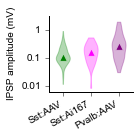

In [15]:
s=15
SstAi_L23pyr=SstAi167[(SstAi167.post_layer==2) & (SstAi167.post_class=='pyramidal')]
SstKv_L23pyr=SstKv[(SstKv.post_layer==2) & (SstKv.post_class=='pyramidal')]

df_list=[SstKv_L23pyr,SstAi_L23pyr,Pvalb_L23pyr]
tick_labels=['Sst:AAV','Sst:Ai167','Pvalb:AAV']
markers=['^','^','^']
colors=['green','magenta', 'purple']
colors2=['green','magenta', 'purple']
fig, ax = plt.subplots()
master_dists=[]
for i in range(len(df_list)):
    df=df_list[i]
    df=df[df.cnx=='inhibitory']
    df=df.dropna(subset=['peakOfAvg'])
    y=np.array(df.peakOfAvg*-1)
    y=np.log10(y)
    x=np.random.normal(i,0.1, size=len(y))
    mark=markers[i]
    color=colors[i]
    color2=colors2[i]
    master_dists.append(y)
    #ax.scatter(x, y, edgecolor=color, alpha=0.5,marker=mark,facecolor='none',s=s)
    ax.scatter(i+1,np.median(y),facecolor=color2,marker=mark,s=s*4,edgecolor='white')
violin_parts=ax.violinplot(master_dists,showmeans=False, showmedians=False,
        showextrema=False,points=1000)
i=0
for pc in violin_parts['bodies']:
    mark=markers[i]
    color=colors[i]
    pc.set_facecolor(color)
    pc.set_edgecolor(color)
    
    i+=1    
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_tick_params(size=tick_size,labelsize=fs, direction='out')
ax.xaxis.set_tick_params(size=tick_size,labelsize=fs, direction='out')
ax.yaxis.set_major_formatter(FormatStrFormatter('%g'))
ax.yaxis.set_major_locator(plt.MaxNLocator(4))

plt.xticks(range(1,len(df_list)+1), tick_labels, rotation='vertical')
plt.yticks([-2,-1,0,1],['0.01','0.1','1','10'])

plt.ylim([-2.2,0.5])
plt.ylabel('IPSP amplitude (mV)')
fig.set_figheight(1.5)
fig.set_figwidth(1.5)
fig.autofmt_xdate()


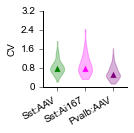

In [16]:
s=15
SstAi_L23pyr=SstAi167[(SstAi167.post_layer==2) & (SstAi167.post_class=='pyramidal')]
SstKv_L23pyr=SstKv[(SstKv.post_layer==2) & (SstKv.post_class=='pyramidal')]

df_list=[SstKv_L23pyr,SstAi_L23pyr,Pvalb_L23pyr]
tick_labels=['Sst:AAV','Sst:Ai167','Pvalb:AAV']
markers=['^','^','^']
colors=['green','magenta', 'purple']
colors2=['green','magenta', 'purple']
fig, ax = plt.subplots()
master_dists=[]
for i in range(len(df_list)):
    df=df_list[i]
    df=df[df.cnx=='inhibitory']
    df=df.dropna(subset=['peakOfAvg'])
    y=np.array(df.CV)

    x=np.random.normal(i,0.1, size=len(y))
    mark=markers[i]
    color=colors[i]
    color2=colors2[i]
    master_dists.append(y)

    ax.scatter(i+1,np.median(y),facecolor=color2,marker=mark,s=s*4,edgecolor='white')
violin_parts=ax.violinplot(master_dists,showmeans=False, showmedians=False,
        showextrema=False,points=1000)
i=0
for pc in violin_parts['bodies']:
    mark=markers[i]
    color=colors[i]
    pc.set_facecolor(color)
    pc.set_edgecolor(color)
    
    i+=1    
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_tick_params(size=tick_size,labelsize=fs, direction='out')
ax.xaxis.set_tick_params(size=tick_size,labelsize=fs, direction='out')
ax.yaxis.set_major_formatter(FormatStrFormatter('%g'))
ax.yaxis.set_major_locator(plt.MaxNLocator(4))

plt.xticks(range(1,len(df_list)+1), tick_labels, rotation='vertical')

plt.ylabel('CV')
fig.set_figheight(1.5)
fig.set_figwidth(1.5)
fig.autofmt_xdate()


Penk to PC
16 connections measured
Rorb to PC
245 connections measured
Tlx3 to PC
85 connections measured
Penk to FSI
28 connections measured
Rorb to FSI
24 connections measured
Tlx3 to FSI
9 connections measured


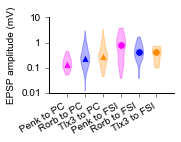

In [19]:
s=15
fs=10
tick_size=4
df_list=[Penk_L23pyr,Rorb_L23pyr, Tlx3_L23pyr,Penk_L23fsi,Rorb_L23fsi,  Tlx3_L23fsi]
tick_labels=['Penk to PC', 'Rorb to PC', 'Tlx3 to PC','Penk to FSI','Rorb to FSI',  'Tlx3 to FSI']
markers=['^','^','^','o','o','o']
colors=['magenta',  'blue', 'darkorange', 'magenta',  'blue', 'darkorange',]
fig, ax = plt.subplots()
master_dists=[]

for i in range(len(df_list)):
    df=df_list[i]
    df=df[df.cnx=='excitatory']
    df=df.dropna(subset=['peakOfAvg'])
    y=np.array(df.peakOfAvg)
    description=tick_labels[i]

    print (description)
    print (np.shape(y)[0], 'connections measured') 
    y=np.log10(y)
    x=np.random.normal(i,0.1, size=len(y))
    master_dists.append(y)
    mark=markers[i]
    color=colors[i]
    quartile1, median, quartile3 = np.percentile(y, [25, 50, 75])

    ax.scatter(i+1,np.median(y),facecolor=color,marker=mark,s=s*4,edgecolor='white')

violin_parts=ax.violinplot(master_dists,showmeans=False, showmedians=False,
        showextrema=False,points=1000)

i=0
for pc in violin_parts['bodies']:
    mark=markers[i]
    color=colors[i]
    pc.set_facecolor(color)
    pc.set_edgecolor(color)
    
    i+=1
plt.xticks(range(1,len(df_list)+1), tick_labels, rotation='vertical')
plt.yticks([-3,-2,-1,0,1],['0.001','0.01','0.1','1','10'])
#plt.yscale('log')
plt.ylim([-2,1])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_tick_params(size=tick_size,labelsize=fs, direction='out')
ax.xaxis.set_tick_params(size=tick_size,labelsize=fs, direction='out')

plt.ylabel('EPSP amplitude (mV)')
fig.set_figheight(1.5)
fig.set_figwidth(2.25)
fig.autofmt_xdate()


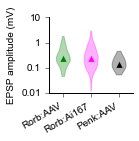

In [18]:
s=15
fs=10
tick_size=4
RorbAi_L23pyr=RorbAi167[(RorbAi167.post_layer==2) & (RorbAi167.post_class=='pyramidal')]
RorbKv_L23pyr=RorbKv[(RorbKv.post_layer==2) & (RorbKv.post_class=='pyramidal')]
df_list=[RorbKv_L23pyr,RorbAi_L23pyr,Penk_L23pyr]
tick_labels=['Rorb:AAV','Rorb:Ai167','Penk:AAV' ]
markers=['^','^','^']
colors=['green','magenta','black']
fig, ax = plt.subplots()
master_dists=[]
for i in range(len(df_list)):
    df=df_list[i]
    df=df[df.cnx=='excitatory']
    df=df.dropna(subset=['peakOfAvg'])
    y=np.array(df.peakOfAvg)
    y=np.log10(y)
    x=np.random.normal(i,0.1, size=len(y))
    master_dists.append(y)
    mark=markers[i]
    color=colors[i]
    quartile1, median, quartile3 = np.percentile(y, [25, 50, 75])
    ax.scatter(i+1,np.median(y),facecolor=color,marker=mark,s=s*4,edgecolor='white')

violin_parts=ax.violinplot(master_dists,showmeans=False, showmedians=False,
        showextrema=False,points=1000)

i=0
for pc in violin_parts['bodies']:
    mark=markers[i]
    color=colors[i]
    pc.set_facecolor(color)
    pc.set_edgecolor(color)
    
    i+=1
plt.xticks(range(1,len(df_list)+1), tick_labels, rotation='vertical')
plt.yticks([-3,-2,-1,0,1],['0.001','0.01','0.1','1','10'])
#plt.yscale('log')
plt.ylim([-2,1])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_tick_params(size=tick_size,labelsize=fs, direction='out')
ax.xaxis.set_tick_params(size=tick_size,labelsize=fs, direction='out')

plt.ylabel('EPSP amplitude (mV)')
fig.set_figheight(1.5)
fig.set_figwidth(1.5)
fig.autofmt_xdate()


Rorb:AAV
(89,)
0.41991284 0.58066487 0.7232548000000001
Rorb:Ai167
(155,)
0.438246175 0.62812042 0.784313915
Penk:AAV
(16,)
0.5940632374999999 0.711771425 1.0316296


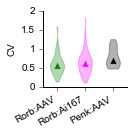

In [24]:
s=15
fs=10
tick_size=4
RorbAi_L23pyr=RorbAi167[(RorbAi167.post_layer==2) & (RorbAi167.post_class=='pyramidal')]
RorbKv_L23pyr=RorbKv[(RorbKv.post_layer==2) & (RorbKv.post_class=='pyramidal')]
df_list=[RorbKv_L23pyr,RorbAi_L23pyr,Penk_L23pyr]
tick_labels=['Rorb:AAV','Rorb:Ai167','Penk:AAV' ]
markers=['^','^','^']
colors=['green','magenta','black']
fig, ax = plt.subplots()
master_dists=[]
for i in range(len(df_list)):
    df=df_list[i]
    df=df[df.cnx=='excitatory']
    df=df.dropna(subset=['CV'])
    y=np.array(df.CV)
    print tick_labels[i]
    print np.shape(y)

    x=np.random.normal(i,0.1, size=len(y))
    master_dists.append(y)
    mark=markers[i]
    color=colors[i]
    quartile1, median, quartile3 = np.percentile(y, [25, 50, 75])
    print quartile1, median, quartile3
    #ax.scatter(x, y, edgecolor=color, alpha=0.5,marker=mark,facecolor='none',s=s)
    ax.scatter(i+1,np.median(y),facecolor=color,marker=mark,s=s*4,edgecolor='white')

violin_parts=ax.violinplot(master_dists,showmeans=False, showmedians=False,
        showextrema=False,points=1000)

i=0
for pc in violin_parts['bodies']:
    mark=markers[i]
    color=colors[i]
    pc.set_facecolor(color)
    pc.set_edgecolor(color)
    
    i+=1
plt.xticks(range(1,len(df_list)+1), tick_labels, rotation='vertical')
#plt.yticks([-3,-2,-1,0,1],['0.001','0.01','0.1','1','10'])
#plt.yscale('log')
#plt.ylim([-2,1])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_tick_params(size=tick_size,labelsize=fs, direction='out')
ax.xaxis.set_tick_params(size=tick_size,labelsize=fs, direction='out')
ax.yaxis.set_major_formatter(FormatStrFormatter('%g'))
plt.ylabel('CV')
fig.set_figheight(1.5)
fig.set_figwidth(1.5)
fig.autofmt_xdate()
plt.savefig('Rorb_Ai_v_AAV_CV.svg')

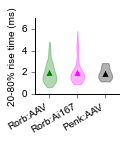

In [20]:
s=15
fs=10
tick_size=4
df_list=[RorbKv_L23pyr,RorbAi_L23pyr,Penk_L23pyr]
tick_labels=['Rorb:AAV','Rorb:Ai167','Penk:AAV' ]
markers=['^','^','^']
colors=['green','magenta','black']
fig, ax = plt.subplots()
master_dists=[]
for i in range(len(df_list)):
    df=df_list[i]
    df=df[df.cnx=='excitatory']
    df=df.dropna(subset=['rise2080'])
    df=df[df.peakOfAvg>0.1]
    y=df.rise2080
    master_dists.append(np.array(y))
    mark=markers[i]
    color=colors[i]
    ax.scatter(i+1,np.mean(y),facecolor=color,marker=mark,s=s*4,edgecolor='white')

violin_parts=ax.violinplot(master_dists,showmeans=False, showmedians=False,
        showextrema=False,points=100)

i=0
for pc in violin_parts['bodies']:
    mark=markers[i]
    color=colors[i]
    pc.set_facecolor(color)
    pc.set_edgecolor(color)
    
    i+=1
    

plt.xticks(range(1,len(df_list)+1), tick_labels, rotation='vertical')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_tick_params(size=tick_size,labelsize=fs, direction='out')
ax.xaxis.set_tick_params(size=tick_size,labelsize=fs, direction='out')
ax.yaxis.set_major_locator(plt.MaxNLocator(4))
plt.ylabel('20-80% rise time (ms)')
fig.set_figheight(1.5)
fig.set_figwidth(1.5)
fig.autofmt_xdate()


In [26]:
p_vals=[]
df1=SstAi_L23pyr
df2=SstKv_L23pyr
df1=df1[df1.cnx=='inhibitory']
df2=df2[df2.cnx=='inhibitory']
df1=df1.dropna(subset=['peakOfAvg'])
df2=df2.dropna(subset=['peakOfAvg'])

print stats.mannwhitneyu(df1.peakOfAvg, df2.peakOfAvg)
p_vals.append(stats.mannwhitneyu(df1.peakOfAvg, df2.peakOfAvg)[1])
print np.mean(df1.peakOfAvg), np.mean(df2.peakOfAvg)
print np.median(df1.peakOfAvg), np.median(df2.peakOfAvg)

df1=SstAi_L23pyr
df2=SstKv_L23pyr
df1=df1[df1.cnx=='inhibitory']
df2=df2[df2.cnx=='inhibitory']
df1=df1.dropna(subset=['CV'])
df2=df2.dropna(subset=['CV'])

print stats.mannwhitneyu(df1.CV, df2.CV)
p_vals.append(stats.mannwhitneyu(df1.CV, df2.CV)[1])
df1=SstAi_L23pyr
df2=SstKv_L23pyr
df1=df1[df1.cnx=='inhibitory']
df2=df2[df2.cnx=='inhibitory']
df1=df1.dropna(subset=['peakOfAvg'])
df2=df2.dropna(subset=['peakOfAvg'])
df1=df1[df1.peakOfAvg<-0.1]
df2=df2[df2.peakOfAvg<-0.1]
print stats.mannwhitneyu(df1.rise2080, df2.rise2080)
p_vals.append(stats.mannwhitneyu(df1.rise2080, df2.rise2080)[1])

df1=RorbAi_L23pyr
df2=RorbKv_L23pyr
df1=df1[df1.cnx=='excitatory']
df2=df2[df2.cnx=='excitatory']
df1=df1.dropna(subset=['peakOfAvg'])
df2=df2.dropna(subset=['peakOfAvg'])

print stats.mannwhitneyu(df1.peakOfAvg, df2.peakOfAvg)
p_vals.append(stats.mannwhitneyu(df1.peakOfAvg, df2.peakOfAvg)[1])
print np.mean(df1.peakOfAvg), np.mean(df2.peakOfAvg)
print np.median(df1.peakOfAvg), np.median(df2.peakOfAvg)

df1=RorbAi_L23pyr
df2=RorbKv_L23pyr
df1=df1[df1.cnx=='excitatory']
df2=df2[df2.cnx=='excitatory']
df1=df1.dropna(subset=['CV'])
df2=df2.dropna(subset=['CV'])

print stats.mannwhitneyu(df1.CV, df2.CV)
p_vals.append(stats.mannwhitneyu(df1.CV, df2.CV)[1])
df1=RorbAi_L23pyr
df2=RorbKv_L23pyr
df1=df1[df1.cnx=='excitatory']
df2=df2[df2.cnx=='excitatory']
df1=df1.dropna(subset=['peakOfAvg'])
df2=df2.dropna(subset=['peakOfAvg'])
df1=df1[df1.peakOfAvg>0.1]
df2=df2[df2.peakOfAvg>0.1]
print stats.mannwhitneyu(df1.rise2080, df2.rise2080)
p_vals.append(stats.mannwhitneyu(df1.rise2080, df2.rise2080)[1])
print p_vals

MannwhitneyuResult(statistic=1660.0, pvalue=0.0388032611238185)
-0.189816673375 -0.152266245869
-0.16502635999999998 -0.11082918
MannwhitneyuResult(statistic=1952.0, pvalue=0.2958531964030644)
MannwhitneyuResult(statistic=767.0, pvalue=0.3426100156020233)
MannwhitneyuResult(statistic=6726.0, pvalue=0.3431296965410902)
0.393017564212 0.36637278018
0.25463162500000003 0.24323463
MannwhitneyuResult(statistic=6301.0, pvalue=0.13071148155458895)
MannwhitneyuResult(statistic=5108.0, pvalue=0.4630172815898025)
[0.0388032611238185, 0.2958531964030644, 0.3426100156020233, 0.3431296965410902, 0.13071148155458895, 0.4630172815898025]


In [27]:
print sm.stats.multipletests(p_vals, alpha=0.1, method='fdr_bh', is_sorted=False, returnsorted=False)


(array([False, False, False, False, False, False]), array([0.23281957, 0.41175564, 0.41175564, 0.41175564, 0.39213444,
       0.46301728]), 0.01740680614731016, 0.016666666666666666)


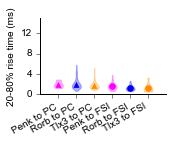

In [22]:
s=15
fs=10
tick_size=4
df_list=[Penk_L23pyr,Rorb_L23pyr, Tlx3_L23pyr,Penk_L23fsi,Rorb_L23fsi,  Tlx3_L23fsi]
tick_labels=['Penk to PC', 'Rorb to PC', 'Tlx3 to PC','Penk to FSI','Rorb to FSI',  'Tlx3 to FSI']
markers=['^','^','^','o','o','o']
colors=['magenta',  'blue', 'darkorange', 'magenta',  'blue', 'darkorange',]
fig, ax = plt.subplots()
master_dists=[]
for i in range(len(df_list)):
    df=df_list[i]
    df=df[df.cnx=='excitatory']
    df=df.dropna(subset=['rise2080'])
    df=df[df.peakOfAvg>0.1]
    y=df.rise2080
    description=tick_labels[i]
    x=np.random.normal(i,0.1, size=len(y))
    master_dists.append(np.array(y))
    mark=markers[i]
    color=colors[i]
    ax.scatter(i+1,np.mean(y),facecolor=color,marker=mark,s=s*4,edgecolor='white')

violin_parts=ax.violinplot(master_dists,showmeans=False, showmedians=False,
        showextrema=False,points=100)

i=0
for pc in violin_parts['bodies']:
    mark=markers[i]
    color=colors[i]
    pc.set_facecolor(color)
    pc.set_edgecolor(color)
    
    i+=1
    

plt.xticks(range(1,len(df_list)+1), tick_labels, rotation='vertical')

plt.ylim(0.0,15)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_tick_params(size=tick_size,labelsize=fs, direction='out')
ax.xaxis.set_tick_params(size=tick_size,labelsize=fs, direction='out')
ax.yaxis.set_major_locator(plt.MaxNLocator(4))
plt.ylabel('20-80% rise time (ms)')
fig.set_figheight(1.5)
fig.set_figwidth(2.25)
fig.autofmt_xdate()


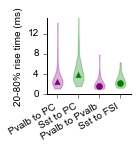

In [25]:
s=15
fs=10
tick_size=4
Pvalb_Pvalb_sub=Pvalb_Pvalb[Pvalb_Pvalb.xyz_dist>100]
df_list=[Pvalb_L23pyr,Sst_L23pyr,Pvalb_Pvalb_sub,Sst_L23fsi]
tick_labels=['Pvalb to PC', 'Sst to PC', 'Pvalb to Pvalb','Sst to FSI']
markers=['^','^','o','o',]
colors=['purple',  'green', 'purple','green']
colors2=['purple',  'green','purple', 'green']
master_dists=[]

fig, ax = plt.subplots()
for i in range(len(df_list)):
    df=df_list[i]
    df=df[df.cnx=='inhibitory']
    df=df.dropna(subset=['rise2080'])
    df=df[df.peakOfAvg<-0.1]
    description=tick_labels[i]
    y=df.rise2080
    
    master_dists.append(np.array(y))
    x=np.random.normal(i,0.1, size=len(y))
    mark=markers[i]
    color=colors[i]

    ax.scatter(i+1,np.median(y),facecolor=color,marker=mark,s=s*4,edgecolor='white')
violin_parts=ax.violinplot(master_dists,showmeans=False, showmedians=False,
        showextrema=False,points=1000)
plt.xticks(range(1,len(df_list)+1), tick_labels, rotation='vertical')

i=0
for pc in violin_parts['bodies']:
    mark=markers[i]
    color=colors[i]
    pc.set_facecolor(color)
    pc.set_edgecolor(color)
    
    i+=1

plt.ylim(0.0,15)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_tick_params(size=tick_size,labelsize=fs, direction='out')
ax.xaxis.set_tick_params(size=tick_size,labelsize=fs, direction='out')
ax.yaxis.set_major_locator(plt.MaxNLocator(4))
plt.ylabel('20-80% rise time (ms)')
fig.set_figheight(1.5)
fig.set_figwidth(1.5)
fig.autofmt_xdate()



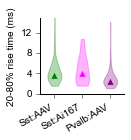

In [26]:
s=15
fs=10
tick_size=4

df_list=[SstKv_L23pyr,SstAi_L23pyr,Pvalb_L23pyr]
tick_labels=['Sst:AAV','Sst:Ai167','Pvalb:AAV']
markers=['^','^','^','o',]
colors=['green',  'magenta', 'purple']
colors2=['green',  'magenta', 'purple']
master_dists=[]
fig, ax = plt.subplots()
for i in range(len(df_list)):
    df=df_list[i]
    df=df[df.cnx=='inhibitory']
    df=df.dropna(subset=['rise2080'])
    df=df[df.peakOfAvg<-0.1]
    y=df.rise2080
    master_dists.append(np.array(y))
    x=np.random.normal(i,0.1, size=len(y))
    mark=markers[i]
    color=colors[i]

    ax.scatter(i+1,np.median(y),facecolor=color,marker=mark,s=s*4,edgecolor='white')
violin_parts=ax.violinplot(master_dists,showmeans=False, showmedians=False,
        showextrema=False,points=1000)
plt.xticks(range(1,len(df_list)+1), tick_labels, rotation='vertical')

i=0
for pc in violin_parts['bodies']:
    mark=markers[i]
    color=colors[i]
    pc.set_facecolor(color)
    pc.set_edgecolor(color)
    
    i+=1

plt.ylim(0.0,15)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_tick_params(size=tick_size,labelsize=fs, direction='out')
ax.xaxis.set_tick_params(size=tick_size,labelsize=fs, direction='out')
ax.yaxis.set_major_locator(plt.MaxNLocator(4))
plt.ylabel('20-80% rise time (ms)')
fig.set_figheight(1.5)
fig.set_figwidth(1.5)
fig.autofmt_xdate()


In [27]:
color_dict={'Scnn1a':'blue', 'Rorb':'blue', 'Tlx3':'darkorange', 'Ntsr1':'red', 'Penk':'magenta', 'Sst':'green','Pvalb':'purple'}


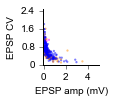

In [28]:
fs=10
fig, ax=plt.subplots()
df1=exc_L23_pyr
df1=df1[df1.cnx=='excitatory']
df1=df1.dropna(subset=['peakOfAvg'])
ax.scatter(df1.peakOfAvg, df1.CV,facecolor=[color_dict[i] for i in df1.presynapticCre],alpha=0.5,s=5,edgecolors='none')

plt.axis([-0.05,5,0,2.5])
plt.ylabel('EPSP CV', fontsize=fs)
plt.xlabel('EPSP amp (mV)', fontsize=fs)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_tick_params(size=tick_size,labelsize=fs, direction='out')
ax.xaxis.set_tick_params(size=tick_size,labelsize=fs, direction='out')
ax.xaxis.set_major_formatter(FormatStrFormatter('%g'))
ax.yaxis.set_major_formatter(FormatStrFormatter('%g'))
ax.xaxis.set_major_formatter(FormatStrFormatter('%g'))
ax.xaxis.set_major_locator(plt.MaxNLocator(4))
ax.yaxis.set_major_formatter(FormatStrFormatter('%g'))
ax.yaxis.set_major_locator(plt.MaxNLocator(4))
fig.set_figheight(1)
fig.set_figwidth(1) 


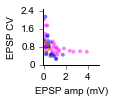

In [29]:
fs=10
fig, ax=plt.subplots()

df1=exc_L23_fsi
df1=df1[df1.cnx=='excitatory']
df1=df1.dropna(subset=['peakOfAvg'])
ax.scatter(df1.peakOfAvg, df1.CV,facecolor=[color_dict[i] for i in df1.presynapticCre],alpha=0.5,s=15,edgecolors='None')
plt.axis([-0.05,5,0,2.5])
plt.ylabel('EPSP CV', fontsize=fs)
plt.xlabel('EPSP amp (mV)', fontsize=fs)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_tick_params(size=tick_size,labelsize=fs, direction='out')
ax.xaxis.set_tick_params(size=tick_size,labelsize=fs, direction='out')
ax.xaxis.set_major_formatter(FormatStrFormatter('%g'))
ax.yaxis.set_major_formatter(FormatStrFormatter('%g'))
ax.xaxis.set_major_formatter(FormatStrFormatter('%g'))
ax.xaxis.set_major_locator(plt.MaxNLocator(4))
ax.yaxis.set_major_formatter(FormatStrFormatter('%g'))
ax.yaxis.set_major_locator(plt.MaxNLocator(4))
fig.set_figheight(1)
fig.set_figwidth(1) 


SpearmanrResult(correlation=-0.7557812676309871, pvalue=4.528616272290246e-67)
SpearmanrResult(correlation=-0.5765203595980961, pvalue=1.1594341822763673e-06)


(-0.1, 5.0)

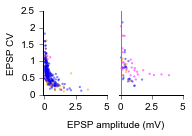

In [30]:
gskw = dict(width_ratios=[1,1], wspace=0.2)

gs = matplotlib.gridspec.GridSpec(1,2, **gskw)
mp=20
fig = plt.figure(figsize=(2.5,1.5))

ax0=fig.add_subplot(gs[0])
ax1=fig.add_subplot(gs[1])
df_list=[exc_L23_pyr, exc_L23_fsi]
colors=['blue', 'darkorange']

df1=exc_L23_pyr
df1=df1[df1.cnx=='excitatory']
df1=df1.dropna(subset=['peakOfAvg','CV'])
print (stats.spearmanr(df1.peakOfAvg, df1.CV))

df2=exc_L23_fsi
df2=df2[df2.cnx=='excitatory']
df2=df2.dropna(subset=['peakOfAvg','CV'])
print (stats.spearmanr(df2.peakOfAvg, df2.CV))
ax0.scatter(df1.peakOfAvg, df1.CV,facecolor=[color_dict[i] for i in df1.presynapticCre],alpha=0.5,s=5,edgecolors='none')
ax1.scatter(df2.peakOfAvg, df2.CV,facecolor=[color_dict[i] for i in df2.presynapticCre],alpha=0.5,s=5,edgecolors='none')
ax1.plot([0,0],[0,3],ls='solid',color='grey')
x_max=5
y_max=2.5
ax0.set_xlim([-0.1,x_max])


ax0.set_ylim([0,y_max])

ax0.set_xlabel('EPSP amplitude (mV)')
ax0.xaxis.set_label_coords(1.15, -0.3)
ax0.set_ylabel('EPSP CV')

ax0.tick_params(axis='both', which='both', labelsize=10, direction='out')
ax0.spines['right'].set_visible(False)
ax0.spines['left'].set_visible(True)
ax0.spines['top'].set_visible(False)
ax0.yaxis.set_ticks_position('left')
ax0.xaxis.set_ticks_position('bottom')
ax0.yaxis.set_major_formatter(FormatStrFormatter('%g'))
ax0.xaxis.set_major_formatter(FormatStrFormatter('%g'))

ax0.xaxis.set_major_locator(plt.MaxNLocator(3))
ax0.axes.xaxis.set_visible(True)

ax1.xaxis.set_major_formatter(FormatStrFormatter('%g'))

ax1.tick_params(axis='both', which='both', labelsize=10, direction='out')
ax1.yaxis.set_ticks_position('none')
ax1.xaxis.set_ticks_position('bottom')
ax1.xaxis.set_major_locator(plt.MaxNLocator(3))
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.axes.yaxis.set_visible(False)

ax1.set_ylim([0,y_max])
ax1.set_xlim([-0.1,x_max])





SpearmanrResult(correlation=-0.6481426461798108, pvalue=7.215941100694793e-30)
SpearmanrResult(correlation=-0.7940749594467685, pvalue=2.1597222259431887e-12)


(-0.1, 2.5)

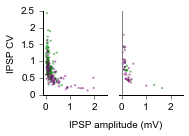

In [31]:
gskw = dict(width_ratios=[1,1], wspace=0.2)

gs = matplotlib.gridspec.GridSpec(1,2, **gskw)
mp=20
fig = plt.figure(figsize=(2.5,1.5))

ax0=fig.add_subplot(gs[0])
ax1=fig.add_subplot(gs[1])


df1=Sst_L23pyr
df1=df1[df1.cnx=='inhibitory']
df2=Pvalb_L23pyr
df2=df2[df2.cnx=='inhibitory']
ax0.scatter(df1.peakOfAvg*-1, df1.CV,c='green',alpha=0.5,s=5,edgecolors='None')
ax0.scatter(df2.peakOfAvg*-1, df2.CV,c='purple',alpha=0.5,s=5,edgecolors='None')

df1=df1.append(df2)

print (stats.spearmanr(df1.peakOfAvg*-1, df1.CV))

df1=Sst_L23fsi
df1=df1[df1.cnx=='inhibitory']
df2=Pvalb_Pvalb

df2=df2[df2.cnx=='inhibitory']
ax1.scatter(df1.peakOfAvg*-1, df1.CV,c='green',alpha=0.5,s=5,edgecolors='None')
ax1.scatter(df2.peakOfAvg*-1, df2.CV,c='purple',alpha=0.5,s=5,edgecolors='None')
df1=df1.append(df2)

print (stats.spearmanr(df1.peakOfAvg*-1, df1.CV))
ax1.plot([0,0],[0,3],ls='solid',color='grey')

ax0.set_xlim([-0.1,2.5])


ax0.set_ylim([0,2.5])

ax0.set_xlabel('IPSP amplitude (mV)')
ax0.xaxis.set_label_coords(1.15, -0.3)
ax0.set_ylabel('IPSP CV')

ax0.tick_params(axis='both', which='both', labelsize=10, direction='out')
ax0.spines['right'].set_visible(False)
ax0.spines['left'].set_visible(True)
ax0.spines['top'].set_visible(False)
ax0.yaxis.set_ticks_position('left')
ax0.xaxis.set_ticks_position('bottom')
ax0.yaxis.set_major_formatter(FormatStrFormatter('%g'))
ax0.xaxis.set_major_formatter(FormatStrFormatter('%g'))

ax0.xaxis.set_major_locator(plt.MaxNLocator(4))
ax0.axes.xaxis.set_visible(True)

ax1.xaxis.set_major_formatter(FormatStrFormatter('%g'))

ax1.tick_params(axis='both', which='both', labelsize=10, direction='out')
ax1.yaxis.set_ticks_position('none')
ax1.xaxis.set_ticks_position('bottom')
ax1.xaxis.set_major_locator(plt.MaxNLocator(4))
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.axes.yaxis.set_visible(False)

ax1.set_ylim([0,2.5])
ax1.set_xlim([-0.1,2.5])





In [33]:
L23=standard_df[standard_df.post_layer==2]
L23pyr=L23[L23.post_class=='pyramidal']
L23pyr_exc=L23pyr[L23pyr.presynapticCre.isin(['Scnn1a', 'Rorb','Tlx3','Ntsr1','Penk'])]
L23int=L23[L23.post_class=='interneuron']
L23int_exc=L23int[L23int.presynapticCre.isin(['Scnn1a', 'Rorb', 'Tlx3', 'Ntsr1','Penk'])]
L23fsi_exc=L23int_exc[L23int_exc.Kcluster==1]

In [36]:
def low_quant(arr):
    return np.quantile(arr,0.25)
def high_quant(arr):
    return np.quantile(arr,0.75)

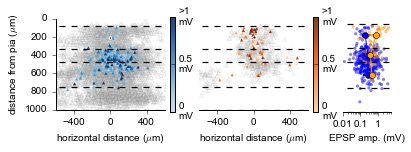

In [37]:

x_lim=[-500,500]
y_lim=[500,0]
fs=10
tick_size=5
vmax=1
vmin=0
font='arial'
size=10

gskw = dict(width_ratios=[5,5,2], wspace=0.25)

gs = matplotlib.gridspec.GridSpec(1,3, **gskw)
mp=20
fig = plt.figure(figsize=(6,1.7))

ax0=fig.add_subplot(gs[0], aspect='equal', adjustable='box')


df=L23pyr_exc
df=df.dropna(subset=['y_pia'])
exc=df[df.cnx=='excitatory']
exc= exc.sort_values(['peakOfAvg'], ascending=1)

cells=exc.groupby(['exp_id', 'headstage']).toPia.mean()
avg_post_cell=np.mean(cells)
ax0.scatter(0,avg_post_cell, marker='^', facecolor='black',s=size,zorder=2,edgecolors='white')

nocnx=df[df.cnx=='no cnx']
ax0.scatter(nocnx.x_ap, nocnx.y_pia, s=15, color='white', alpha=0.1, marker='^', edgecolors='grey')
ax0.tick_params(axis='both', which='major', labelsize=10)
ax0.xaxis.set_ticks([-400,0,400])
opto.layer_borders(ax0)
ax0.axis([-600,600,1000,0])
cm_name='Blues'
full_cmp = plt.get_cmap(cm_name, 512)
newcmp = matplotlib.colors.ListedColormap(full_cmp(np.linspace(0.25, 1, 256)))
heat_cnxs=ax0.scatter(exc.x_ap, exc.y_pia, c=exc.peakOfAvg, vmin=vmin, vmax=vmax, s=size, cmap=newcmp, alpha=0.9
            , marker='^', edgecolors='None',zorder=1)
ax0.set_xlabel('horizontal distance (' r'$\mu$'+'m)', fontsize=10, fontname='arial')
ax0.set_ylabel('distance from pia (' r'$\mu$'+'m)', fontsize=10, fontname='arial')
ax0.tick_params(axis='both', which='both', labelsize=10, direction='out')
ax0.spines['right'].set_visible(False)
ax0.spines['top'].set_visible(False)
ax0.yaxis.set_ticks_position('left')
ax0.xaxis.set_ticks_position('bottom')


ax1=fig.add_subplot(gs[1], aspect='equal', adjustable='box')
df=L23fsi_exc
df=df.dropna(subset=['y_pia'])
exc=df[df.cnx=='excitatory']
exc= exc.sort_values(['peakOfAvg'], ascending=1)

cells=exc.groupby(['exp_id', 'headstage']).toPia.mean()
avg_post_cell=np.mean(cells)
ax1.scatter(0,avg_post_cell, marker='o', facecolor='black',s=size,zorder=2,edgecolors='white')

nocnx=df[df.cnx=='no cnx']
ax1.scatter(nocnx.x_ap, nocnx.y_pia, s=15, color='white', alpha=0.1, marker='^', edgecolors='grey')
ax1.tick_params(axis='both', which='major', labelsize=12)
cm_name1='Oranges'
full_cmp1 = plt.get_cmap(cm_name1, 512)
newcmp1 = matplotlib.colors.ListedColormap(full_cmp1(np.linspace(0.25, 1, 256)))
fsi_cnxs=ax1.scatter(exc.x_ap, exc.y_pia, c=exc.peakOfAvg, vmin=vmin, vmax=vmax, s=size, cmap=newcmp1, alpha=0.9
            , marker='^', edgecolors='none')
ax1.axis([-600,600,1000,0])
ax1.xaxis.set_ticks([-400,0,400])
opto.layer_borders(ax1)
ax1.set_xlabel('horizontal distance (' r'$\mu$'+'m)', fontsize=10, fontname='arial')
ax1.tick_params(axis='both', which='both', labelsize=10, direction='out')
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.yaxis.set_ticks_position('none')
ax1.xaxis.set_ticks_position('bottom')
ax1.axes.yaxis.set_visible(False)
cb=fig.colorbar(heat_cnxs,ticks=[0,0.5,1], ax=ax0,orientation='vertical',fraction=0.046, pad=0.04)
cb.ax.set_yticklabels(['0\nmV', '0.5\nmV','>1\nmV'])
cb.ax.tick_params(labelsize=10)
cb1=fig.colorbar(fsi_cnxs,ticks=[0,0.5,1], ax=ax1,orientation='vertical',fraction=0.046, pad=0.04)
cb1.ax.set_yticklabels(['0\nmV', '0.5\nmV','>1\nmV'])
cb1.ax.set_ylim([0,1])
cb1.ax.tick_params(labelsize=10)


ax2=fig.add_subplot(gs[2])
s=3
df1=L23pyr_exc.dropna(subset=['y_pia'])
df1=df1[df1.cnx=='excitatory']
df2=L23fsi_exc.dropna(subset=['y_pia'])
df2=df2[df2.cnx=='excitatory']
df_list=[df1,df2]
colors=['blue', 'darkorange']
colors2=['blue','orange']
off=-15
min_cnx=3
bins=[50,330,480,750]

for df, color,color2 in zip(df_list, colors,colors2):
    df=df.dropna(subset=['peakOfAvg'])
    ax2.scatter(df.peakOfAvg,df.y_pia, facecolor=color,edgecolors='none',alpha=0.5,s=10)
    binned_median=stats.binned_statistic(df.y_pia,df.peakOfAvg, bins=bins, statistic='median')[0]
    binned_up=stats.binned_statistic(df.y_pia,df.peakOfAvg,bins=bins,statistic=high_quant)[0]
    binned_low=stats.binned_statistic(df.y_pia,df.peakOfAvg,bins=bins,statistic=low_quant)[0]
    count=stats.binned_statistic(df.y_pia,df.peakOfAvg,  bins=bins, statistic='count')[0]
    
    thresh=count>min_cnx

    x=binned_median[thresh]
    y=opto.midPoints(bins)[thresh]
    xerr=[x-binned_low[thresh],binned_up[thresh]-x]
    ax2.errorbar(x, y, xerr=xerr, color=color2,  marker='o', ms=6,elinewidth=2, capsize=1)
    #ax1.errorbar(x, y, yerr=yerr, color=color2,  marker='o', ms=6,elinewidth=2, capsize=1,xlolims=True)
    off+=30



opto.layer_borders(ax2)
ax2.axis([0.01,5,1000,0])

ax2.set_xscale('log')
ax2.set_xlabel('EPSP amp. (mV)', fontsize=10, fontname='arial')
ax2.tick_params(axis='both', which='both', labelsize=10, direction='out')
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.yaxis.set_ticks_position('none')
ax2.xaxis.set_ticks_position('bottom')
ax2.xaxis.set_major_formatter(FormatStrFormatter('%g'))

ax2.axes.yaxis.set_visible(False)


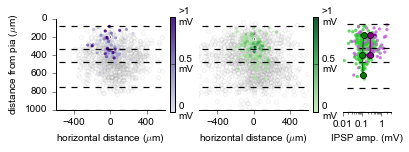

In [39]:

x_lim=[-500,500]
y_lim=[500,0]
fs=10
tick_size=5
cmap='Blues'
vmax=1
font='arial'
size=10

gskw = dict(width_ratios=[5,5,2], wspace=0.25)

gs = matplotlib.gridspec.GridSpec(1,3, **gskw)
mp=20
fig = plt.figure(figsize=(6,1.7))

ax0=fig.add_subplot(gs[0], aspect='equal', adjustable='box')


df=Pvalb_L23pyr


inh=df[df.cnx=='inhibitory']
inh=inh.sort_values(['peakOfAvg'], ascending=0)
nocnx=df[df.cnx=='no cnx']
cells=inh.groupby(['exp_id', 'headstage']).toPia.mean()
avg_post_cell=np.mean(cells)
for cell in cells:
    ax0.scatter(0,cell, marker='^', color='black', alpha=0.03, s=size,zorder=0)
ax0.scatter(0,avg_post_cell, marker='^', facecolor='black',s=size,zorder=2,edgecolors='white')
nocnx=df[df.cnx=='no cnx']
ax0.scatter(nocnx.x_ap, nocnx.y_pia, s=15, color='white', alpha=0.1, marker='o', edgecolors='grey',zorder=1)

ax0.tick_params(axis='both', which='major', labelsize=10)
ax0.xaxis.set_ticks([-400,0,400])
opto.layer_borders(ax0)
ax0.axis([-600,600,1000,0])
cm_name='Purples'
full_cmp = plt.get_cmap(cm_name, 512)
newcmp = matplotlib.colors.ListedColormap(full_cmp(np.linspace(0.25, 1, 256)))
pv_cnxs=ax0.scatter(inh.x_ap, inh.y_pia, c=inh.peakOfAvg*-1, vmin=0, vmax=vmax, s=size, cmap=newcmp, alpha=0.9
            , marker='o', edgecolors='None',zorder=1)
ax0.set_xlabel('horizontal distance (' r'$\mu$'+'m)', fontsize=10, fontname='arial')
ax0.set_ylabel('distance from pia (' r'$\mu$'+'m)', fontsize=10, fontname='arial')
ax0.tick_params(axis='both', which='both', labelsize=10, direction='out')
ax0.spines['right'].set_visible(False)
ax0.spines['top'].set_visible(False)
ax0.yaxis.set_ticks_position('left')
ax0.xaxis.set_ticks_position('bottom')

cb=fig.colorbar(pv_cnxs,ticks=[0,0.5,1], ax=ax0,fraction=0.046, pad=0.04)

cb.ax.set_yticklabels(['0\nmV', '0.5\nmV','>1\nmV'])
#cb.set_label('IPSP amplitude (mV)', fontsize=10, fontname='arial')
cb.ax.tick_params(labelsize=10)

ax1=fig.add_subplot(gs[1], aspect='equal', adjustable='box')
df=Sst_L23pyr
df=df.dropna(subset=['y_pia'])


inh=df[df.cnx=='inhibitory']
inh=inh.sort_values(['peakOfAvg'], ascending=0)
nocnx=df[df.cnx=='no cnx']
cells=inh.groupby(['exp_id', 'headstage']).toPia.mean()

avg_post_cell=np.mean(cells)
for cell in cells:
    ax1.scatter(0,cell, marker='^', color='black', alpha=0.03, s=size,zorder=0)
ax1.scatter(0,avg_post_cell, marker='^', facecolor='black',s=size,zorder=2,edgecolors='white')
nocnx=df[df.cnx=='no cnx']
ax1.scatter(nocnx.x_ap, nocnx.y_pia, s=15, color='white', alpha=0.1, marker='o', edgecolors='grey',zorder=1)
ax1.tick_params(axis='both', which='major', labelsize=10)
cm_name1='Greens'
full_cmp1 = plt.get_cmap(cm_name1, 512)
newcmp1 = matplotlib.colors.ListedColormap(full_cmp1(np.linspace(0.25, 1, 256)))
sst_cnxs=ax1.scatter(inh.x_ap, inh.y_pia, c=inh.peakOfAvg*-1, vmin=0, vmax=vmax, s=size, cmap=newcmp1, alpha=0.9
            , marker='o', edgecolors='None',zorder=1)

ax1.axis([-600,600,1000,0])

ax1.xaxis.set_ticks([-400,0,400])
opto.layer_borders(ax1)
ax1.set_xlabel('horizontal distance (' r'$\mu$'+'m)', fontsize=10, fontname='arial')

ax1.tick_params(axis='both', which='both', labelsize=10, direction='out')
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.yaxis.set_ticks_position('none')
ax1.xaxis.set_ticks_position('bottom')
ax1.axes.yaxis.set_visible(False)

cb1=fig.colorbar(sst_cnxs,ticks=[0,0.5,1], ax=ax1,fraction=0.046, pad=0.04)
cb1.ax.set_yticklabels(['0\nmV', '0.5\nmV','>1\nmV'])

cb1.ax.tick_params(labelsize=10)

ax2=fig.add_subplot(gs[2])
s=3
df_list=[Sst_L23pyr, Pvalb_L23pyr]
colors=['limegreen','mediumorchid']
colors2=['green','purple']
bins=[50,330,480,750,1000]
#bins=np.arange(50,1050,100)
off=0
min_cnx=3
for df, color in zip(df_list, colors):
    for df, color,color2 in zip(df_list, colors,colors2):
        df=df.dropna(subset=['peakOfAvg'])
        ax2.scatter(abs(df.peakOfAvg),df.y_pia, facecolor=color,edgecolors='none',alpha=0.5,s=10)
        binned_median=stats.binned_statistic(df.y_pia,abs(df.peakOfAvg), bins=bins, statistic='median')[0]
        binned_up=stats.binned_statistic(df.y_pia,abs(df.peakOfAvg),bins=bins,statistic=high_quant)[0]
        binned_low=stats.binned_statistic(df.y_pia,abs(df.peakOfAvg),bins=bins,statistic=low_quant)[0]
        count=stats.binned_statistic(df.y_pia,abs(df.peakOfAvg),  bins=bins, statistic='count')[0]

        thresh=count>min_cnx

        x=binned_median[thresh]
        y=opto.midPoints(bins)[thresh]
        xerr=[x-binned_low[thresh],binned_up[thresh]-x]
        ax2.errorbar(x, y, xerr=xerr, color=color2,  marker='o', ms=6,elinewidth=2, capsize=1)
        #ax1.errorbar(x, y, yerr=yerr, color=color2,  marker='o', ms=6,elinewidth=2, capsize=1,xlolims=True)
        off+=30

opto.layer_borders(ax2)
ax2.axis([0.01,3,1000,0])

ax2.set_xscale('log')
ax2.set_xlabel('IPSP amp. (mV)',fontsize=10,fontname='arial')
ax2.tick_params(axis='both', which='both', labelsize=10, direction='out')
ax2.xaxis.set_major_formatter(FormatStrFormatter('%g'))

ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.yaxis.set_ticks_position('none')
ax2.xaxis.set_ticks_position('bottom')
ax2.axes.yaxis.set_visible(False)


Text(0.5, 0, 'horizontal distance ($\\mu$m)')

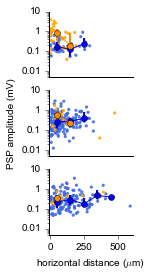

In [40]:
gskw = dict(height_ratios=[1,1,1], wspace=0.2)

gs = matplotlib.gridspec.GridSpec(3,1, **gskw)
mp=20
fig = plt.figure(figsize=(1.5,4))

ax0=fig.add_subplot(gs[0])
ax1=fig.add_subplot(gs[1])
ax2=fig.add_subplot(gs[2])

df_list=[exc_L23_pyr, exc_L23_fsi]
colors=['royalblue', 'orange']
colors2=['blue','darkorange']
off=0
min_cnx=3
x_bins=np.arange(0,601,100)
y_bins=[50,330,480,750]
min_cnx=2

for df, color,color2 in zip(df_list, colors,colors2):
    df=df.dropna(subset=['peakOfAvg'])
    df=df[df.cnx=='excitatory']
    L2=df[df.y_pia<330]
    L4=df[(df.y_pia>330) & (df.y_pia<480)]
    L5=df[(df.y_pia>480)]
    ec='none'
    ax0.scatter(L2.abs_x, L2.peakOfAvg,facecolor=color,edgecolors=ec,alpha=0.9,s=10)
    ax1.scatter(L4.abs_x, L4.peakOfAvg, facecolor=color, edgecolors=ec, alpha=0.9, s=10)
    ax2.scatter(L5.abs_x, L5.peakOfAvg, facecolor=color, edgecolors=ec, alpha=0.9, s=10)
    for Ldf, ax in zip([L2,L4,L5],[ax0,ax1,ax2]):
        binned_median=stats.binned_statistic(Ldf.abs_x,Ldf.peakOfAvg, bins=x_bins, statistic='median')[0]
        binned_up=stats.binned_statistic(Ldf.abs_x, Ldf.peakOfAvg,bins=x_bins,statistic=high_quant)[0]
        binned_low=stats.binned_statistic(Ldf.abs_x, Ldf.peakOfAvg, bins=x_bins, statistic=low_quant)[0]
        count=stats.binned_statistic(Ldf.abs_x,Ldf.peakOfAvg,  bins=x_bins, statistic='count')[0]
        thresh=count>min_cnx
   
        y=binned_median[thresh]
        x=opto.midPoints(x_bins)[thresh]
        yerr=[y-binned_low[thresh],binned_up[thresh]-y]
        ax.errorbar(x, y, yerr=yerr, color=color2,  marker='o', ms=6,elinewidth=2, capsize=1,xlolims=True)
    
for ax in [ax0,ax1,ax2]:
    ax.set_xlim([-10,610])
    ax.set_ylim([0.005,10])
    ax.set_yscale('log')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.tick_params(axis='both', which='both', labelsize=10, direction='out')
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

    ax.yaxis.set_major_formatter(FormatStrFormatter('%g'))

ax0.axes.xaxis.set_visible(False)
ax1.axes.xaxis.set_visible(False)
ax2.xaxis.set_major_locator(plt.MaxNLocator(4))
ax1.set_ylabel('PSP amplitude (mV)')
ax2.set_xlabel('horizontal distance (' r'$\mu$'+'m)')


Text(0.5, 0, 'horizontal distance ($\\mu$m)')

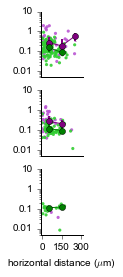

In [41]:
gskw = dict(height_ratios=[1,1,1], wspace=0.2)

gs = matplotlib.gridspec.GridSpec(3,1, **gskw)
mp=20
fig = plt.figure(figsize=(0.75,4))

ax0=fig.add_subplot(gs[0])
ax1=fig.add_subplot(gs[1])
ax2=fig.add_subplot(gs[2])

df_list=[Pvalb_L23pyr, Sst_L23pyr]
colors=['mediumorchid', 'limegreen']
colors2=['purple','green']
off=0
min_cnx=3
x_bins=np.arange(0,601,100)
y_bins=[50,330,480,750]
min_cnx=2

for df, color,color2 in zip(df_list, colors,colors2):
    df=df.dropna(subset=['peakOfAvg'])
    df=df[df.cnx=='inhibitory']
    L2=df[df.y_pia<330]
    L4=df[(df.y_pia>330) & (df.y_pia<480)]
    L5=df[(df.y_pia>480)]
    ec='none'
    ax0.scatter(L2.abs_x, abs(L2.peakOfAvg),facecolor=color,edgecolors=ec,alpha=0.9,s=10)
    ax1.scatter(L4.abs_x, abs(L4.peakOfAvg), facecolor=color, edgecolors=ec, alpha=0.9, s=10)
    ax2.scatter(L5.abs_x, abs(L5.peakOfAvg), facecolor=color, edgecolors=ec, alpha=0.9, s=10)
    for Ldf, ax in zip([L2,L4,L5],[ax0,ax1,ax2]):
        binned_median=stats.binned_statistic(Ldf.abs_x,abs(Ldf.peakOfAvg), bins=x_bins, statistic='median')[0]
        binned_up=stats.binned_statistic(Ldf.abs_x, abs(Ldf.peakOfAvg),bins=x_bins,statistic=high_quant)[0]
        binned_low=stats.binned_statistic(Ldf.abs_x, abs(Ldf.peakOfAvg), bins=x_bins, statistic=low_quant)[0]
        count=stats.binned_statistic(Ldf.abs_x,abs(Ldf.peakOfAvg),  bins=x_bins, statistic='count')[0]
        thresh=count>min_cnx
   
        y=binned_median[thresh]
        x=opto.midPoints(x_bins)[thresh]
        yerr=[y-binned_low[thresh],binned_up[thresh]-y]
        ax.errorbar(x, y, yerr=yerr, color=color2,  marker='o', ms=6,elinewidth=2, capsize=1,xlolims=True)

        
for ax in [ax0,ax1,ax2]:
    ax.set_xlim([-10,310])
    ax.set_ylim([0.005,10])
    ax.set_yscale('log')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.tick_params(axis='both', which='both', labelsize=10, direction='out')
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

    ax.yaxis.set_major_formatter(FormatStrFormatter('%g'))

ax0.axes.xaxis.set_visible(False)
ax1.axes.xaxis.set_visible(False)
ax2.xaxis.set_major_locator(plt.MaxNLocator(4))

ax2.set_xlabel('horizontal distance (' r'$\mu$'+'m)')


In [43]:
def PSP_population_params(df, cnx_call,label):
    cnxs=df[df.cnx==cnx_call]
    cnxs=cnxs.dropna(subset=['peakOfAvg'])
    median=np.median(abs(cnxs.peakOfAvg))
    mean=np.mean(abs(cnxs.peakOfAvg))
    sd=np.std(abs(cnxs.peakOfAvg))
    n=len(cnxs.peakOfAvg)
    skew=stats.skew(abs(cnxs.peakOfAvg))
    CV=np.nanmean(cnxs.CV)
    rise_sub=cnxs[abs(cnxs.peakOfAvg)>0.1]
    rise_mean=np.nanmean(rise_sub.rise2080)
    cnxs=cnxs.dropna(subset=['abs_x','y_pia'])
    XspearmanR,XspearmanP=stats.spearmanr(cnxs.abs_x,cnxs.peakOfAvg)
    YspearmanR,YspearmanP=stats.spearmanr(cnxs.y_pia,cnxs.peakOfAvg)
    PSP_dict={'connection class':label,'amp. median (mV)':median,'amp. mean (mV)':mean,
              'amp. sd (mV)':sd,'amp. skew':skew,'n':n,'CV':CV,'20-80% rise (ms)':rise_mean}
    return PSP_dict
def PSP_dist_corr(df,cnx_call,label):
    cnxs=df[df.cnx==cnx_call]
    cnxs=cnxs.dropna(subset=['peakOfAvg','y_pia','abs_x'])
    amps=cnxs.peakOfAvg
    x=cnxs.abs_x
    y=cnxs.y_pia
    XspearmanR,XspearmanP=stats.spearmanr(x,amps)
    YspearmanR,YspearmanP=stats.spearmanr(y,amps)
    n=len(amps)
    corr_dict={'connection class':label,'horizontal Spearman R':XspearmanR,'horizontal Spearman p':XspearmanP,
             'presyn. pia Spearman R':YspearmanR,'presyn. pia Spearman p':YspearmanP,'n':n}
    return corr_dict

In [46]:
cnx_classes=['Penk to L2/3 PC', 'Rorb to L2/3 PC',  'Tlx3 to L2/3 PC', 'Ntsr1 to L2/3 PC',
             'Penk to L2/3 FSI','Rorb to L2/3 FSI', 'Tlx3 to L2/3 FSI',
             'Pvalb to L2/3 PC', 'Sst to L2/3 PC', 'Pvalb to L2/3 FSI', 'Sst to L2/3 FSI']
df_list=[Penk_L23pyr,Rorb_L23pyr,Tlx3_L23pyr,Ntsr1_L23pyr,Penk_L23fsi,Rorb_L23fsi,Tlx3_L23fsi,
         Pvalb_L23pyr, Sst_L23pyr, Pvalb_Pvalb, Sst_L23fsi]
calls=['excitatory','excitatory','excitatory','excitatory','excitatory','excitatory','excitatory',
      'inhibitory','inhibitory','inhibitory','inhibitory']
rows=[]
corr_rows=[]
for df,label,call in zip(df_list, cnx_classes,calls):
    PSP_dict=PSP_population_params(df,call,label)
    corr_dict=PSP_dist_corr(df,call,label)
    rows.append(PSP_dict)
    corr_rows.append(corr_dict)
PSP_df=pd.DataFrame.from_dict(rows)
corr_df=pd.DataFrame.from_dict(corr_rows)
PSP_df.to_csv('PSP_props.csv')
corr_df.to_csv('PSP_dist_corr.csv')
PSP_df

/var/folders/r_/1r34q4315614mp9bkdvjcjph0000gp/T/ipykernel_61914/1692640933.py:11: RuntimeWarning: Mean of empty slice
  rise_mean=np.nanmean(rise_sub.rise2080)


,connection class,amp. median (mV),amp. mean (mV),amp. sd (mV),amp. skew,n,CV,20-80% rise (ms)
0,Penk to L2/3 PC,0.146486,0.174925,0.104434,1.297460,16,0.797779,1.918923
1,Rorb to L2/3 PC,0.250468,0.383338,0.416290,3.023495,245,0.633395,2.014566
2,Tlx3 to L2/3 PC,0.304859,0.455875,0.513689,3.201072,85,0.538308,1.723459
3,Ntsr1 to L2/3 PC,0.092858,0.092858,0.000000,0.000000,1,1.085600,NaN
4,Penk to L2/3 FSI,0.811742,1.002615,0.985359,1.407496,28,0.896457,1.524869
5,Rorb to L2/3 FSI,0.404168,0.547148,0.382470,1.303851,24,0.754512,1.231490
6,Tlx3 to L2/3 FSI,0.439667,0.396489,0.217038,0.179792,9,0.749269,1.159951
7,Pvalb to L2/3 PC,0.272244,0.406684,0.445330,1.969450,77,0.584943,3.035219
8,Sst to L2/3 PC,0.114605,0.159684,0.127290,2.350467,162,0.849414,4.512205
9,Pvalb to L2/3 FSI,0.155071,0.205219,0.179378,2.608240,34,0.862443,2.029468


In [47]:
corr_df

,connection class,horizontal Spearman R,horizontal Spearman p,presyn. pia Spearman R,presyn. pia Spearman p,n
0,Penk to L2/3 PC,-0.526471,0.036167,-0.505882,0.045582,16
1,Rorb to L2/3 PC,0.079746,0.214513,0.029029,0.651834,244
2,Tlx3 to L2/3 PC,0.184835,0.090363,-0.012859,0.907015,85
3,Ntsr1 to L2/3 PC,NaN,NaN,NaN,NaN,1
4,Penk to L2/3 FSI,-0.351396,0.066712,-0.443350,0.018128,28
5,Rorb to L2/3 FSI,-0.274783,0.193781,-0.054783,0.799308,24
6,Tlx3 to L2/3 FSI,0.716667,0.029818,0.566667,0.111633,9
7,Pvalb to L2/3 PC,0.075556,0.513697,0.170461,0.138288,77
8,Sst to L2/3 PC,0.185061,0.018393,0.044322,0.575454,162
9,Pvalb to L2/3 FSI,-0.073186,0.680829,0.043545,0.806824,34


In [48]:
sub=corr_df.dropna()
horiz_bh= sm.stats.multipletests(sub['horizontal Spearman p'], alpha=0.1, method='fdr_bh', is_sorted=False, returnsorted=False)[1]
pia_bh=sm.stats.multipletests(sub['presyn. pia Spearman p'], alpha=0.1, method='fdr_bh', is_sorted=False, returnsorted=False)[1]
sub['horizontal BH corrected p']=horiz_bh
sub['pia BH corrected p']=pia_bh
sub

/var/folders/r_/1r34q4315614mp9bkdvjcjph0000gp/T/ipykernel_61914/1878958519.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub['horizontal BH corrected p']=horiz_bh
/var/folders/r_/1r34q4315614mp9bkdvjcjph0000gp/T/ipykernel_61914/1878958519.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub['pia BH corrected p']=pia_bh


,connection class,horizontal Spearman R,horizontal Spearman p,presyn. pia Spearman R,presyn. pia Spearman p,n,horizontal BH corrected p,pia BH corrected p
0,Penk to L2/3 PC,-0.526471,0.036167,-0.505882,0.045582,16,0.120555,0.227908
1,Rorb to L2/3 PC,0.079746,0.214513,0.029029,0.651834,244,0.268141,0.896471
2,Tlx3 to L2/3 PC,0.184835,0.090363,-0.012859,0.907015,85,0.167667,0.907015
4,Penk to L2/3 FSI,-0.351396,0.066712,-0.443350,0.018128,28,0.166779,0.181276
5,Rorb to L2/3 FSI,-0.274783,0.193781,-0.054783,0.799308,24,0.268141,0.896471
6,Tlx3 to L2/3 FSI,0.716667,0.029818,0.566667,0.111633,9,0.120555,0.345720
7,Pvalb to L2/3 PC,0.075556,0.513697,0.170461,0.138288,77,0.570775,0.345720
8,Sst to L2/3 PC,0.185061,0.018393,0.044322,0.575454,162,0.120555,0.896471
9,Pvalb to L2/3 FSI,-0.073186,0.680829,0.043545,0.806824,34,0.680829,0.896471
10,Sst to L2/3 FSI,0.399381,0.100600,0.126935,0.615727,18,0.167667,0.896471


In [49]:
sub.to_csv('PSP_dist_corr_BH.csv')

In [50]:
cnx_classes=['Penk to L2/3 PC', 'Rorb to L2/3 PC',  'Tlx3 to L2/3 PC','Penk to L2/3 FSI','Rorb to L2/3 FSI',
            'Tlx3 to L2/3 FSI']
measures=['amp. median', 'amp. mean', 'amp. sd', 'skew', 'CV', 'rise2080']
df_list=[Penk_L23pyr,Rorb_L23pyr,Tlx3_L23pyr,Penk_L23fsi,Rorb_L23fsi,Tlx3_L23fsi]
i=0
amp_master=[]
rise_master=[]
summary_table=np.zeros([len(cnx_classes),len(measures)])
for df in df_list:
    exc_cnxs=df[df.cnx=='excitatory']
    exc_cnxs=exc_cnxs.dropna(subset=['peakOfAvg'])
    class_name=cnx_classes[i]
    
    median=np.median(exc_cnxs.peakOfAvg)
    mean=np.mean(exc_cnxs.peakOfAvg)
    sd=np.std(exc_cnxs.peakOfAvg)
    n=len(exc_cnxs.peakOfAvg)
    skew=stats.skew(exc_cnxs.peakOfAvg)
    CV=np.nanmean(exc_cnxs.CV)
    rise=np.nanmean(exc_cnxs.rise2080)
    summary_table[i,:]=np.array([median, mean, sd, skew,CV,rise])
    amp_master.append(np.array(exc_cnxs.peakOfAvg))
    exc_cnxs_rise=exc_cnxs.dropna(subset=['rise2080'])
    rise_master.append(np.array(exc_cnxs_rise.rise2080))
    i+=1

In [51]:
summary_table

array([[0.14648558, 0.17492532, 0.10443425, 1.29745982, 0.79777858,
        1.90934975],
       [0.25046769, 0.38333844, 0.41629013, 3.0234951 , 0.63339455,
        1.98709483],
       [0.30485916, 0.45587488, 0.51368922, 3.20107168, 0.53830818,
        1.81302675],
       [0.81174159, 1.0026152 , 0.98535925, 1.40749633, 0.89645704,
        1.50738839],
       [0.40416814, 0.54714776, 0.38246963, 1.30385141, 0.7545124 ,
        1.23340415],
       [0.43966651, 0.39648871, 0.21703757, 0.17979232, 0.74926864,
        1.15995129]])

In [159]:
rise_master

[array([2.683795 , 2.0747297, 2.8599808, 1.4448929, 1.6738303, 3.2075   ,
        1.159198 , 1.8764575, 1.4083067, 1.3413532, 2.5492284, 1.9152871,
        1.5358318, 1.9450436, 1.4117105, 1.4624505]),
 array([1.3596911 , 1.5553459 , 3.0199134 , 2.9306331 , 2.1152067 ,
        2.8408008 , 2.0535424 , 2.2181149 , 1.3844702 , 3.816009  ,
        1.9090151 , 4.4006581 , 1.7443912 , 2.1522391 , 1.9310733 ,
        1.5282165 , 2.0274322 , 2.6284692 , 1.8900105 , 1.570716  ,
        2.4289317 , 1.3631972 , 0.8895027 , 1.3939674 , 2.0986636 ,
        1.7223011 , 1.4938915 , 3.1149268 , 1.7617484 , 1.3009888 ,
        1.2806851 , 3.6723666 , 1.8512038 , 1.3525392 , 1.8451043 ,
        1.5819036 , 0.97251111, 1.7556033 , 2.9017696 , 0.952986  ,
        1.9507407 , 0.83621967, 1.4511958 , 0.62154996, 2.2521889 ,
        1.4371904 , 2.8763206 , 2.5951147 , 1.7160072 , 1.8055689 ,
        1.1785498 , 1.8569411 , 1.182345  , 1.2514534 , 1.1492196 ,
        1.7604203 , 1.71297   , 1.3680499 , 1.5322

In [160]:
stats.kruskal(np.array(amp_master[0]),np.array(amp_master[1]),np.array(amp_master[2]))

KruskalResult(statistic=9.468106895411525, pvalue=0.00879076581446018)

In [161]:
stats.kruskal(np.array(rise_master[0]),np.array(rise_master[1]),np.array(rise_master[2]))

KruskalResult(statistic=2.478265188284695, pvalue=0.28963534040160543)

In [54]:
args=[l for l in amp_master]
stats.kruskal(*args)

KruskalResult(statistic=29.257936648730862, pvalue=2.0636327469436655e-05)

In [55]:
def Cohens_d(pop1,pop2):
    u1=np.mean(pop1)
    u2=np.mean(pop2)
    s=np.std(np.append(pop1,pop2))
    s1=np.std(pop1)
    s2=np.std(pop2)
    d=(u2-u1)/((0.5*(s1**2+s2**2)))**0.5
    return d

In [56]:
out_array=np.zeros([6,6])
y_array=range(6)
x_array=range(6)
i=0
for y in y_array:
    x_array=range(0,6)
    for x in x_array:
        #print (cnx_classes[y], cnx_classes[x])
        d=Cohens_d(args[x],args[y])
        #print (d)
        out_array[x,y]=d
    i+=1

In [58]:
import scikit_posthocs as sp

In [59]:
exc_dunn=sp.posthoc_dunn(args,p_adjust='fdr_bh')
exc_dunn

,1,2,3,4,5,6
1,1.000000,0.028032,0.011027,0.000208,0.000771,0.036764
2,0.028032,1.000000,0.264882,0.001488,0.012435,0.409824
3,0.011027,0.264882,1.000000,0.028032,0.092089,0.690034
4,0.000208,0.001488,0.028032,1.000000,0.696673,0.409824
5,0.000771,0.012435,0.092089,0.696673,1.000000,0.544623
6,0.036764,0.409824,0.690034,0.409824,0.544623,1.000000


([<matplotlib.axis.YTick at 0x7f99bd9a1250>,
 [Text(0, 0.5, 'Penk to L2/3 PC'),
  Text(0, 1.5, 'Rorb to L2/3 PC'),
  Text(0, 2.5, 'Tlx3 to L2/3 PC'),
  Text(0, 3.5, 'Penk to L2/3 FSI'),
  Text(0, 4.5, 'Rorb to L2/3 FSI'),
  Text(0, 5.5, 'Tlx3 to L2/3 FSI')])

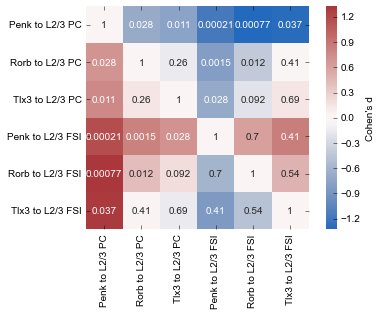

In [60]:
##excitatory amp comparison table
sns.heatmap(np.transpose(out_array),cmap='vlag',square=True, annot=exc_dunn, cbar_kws={'label': "Cohen's d"})
plt.xticks([0.5,1.5,2.5,3.5,4.5,5.5], cnx_classes, rotation='vertical')
plt.yticks([0.5,1.5,2.5,3.5,4.5,5.5], cnx_classes, rotation='horizontal')
#plt.savefig('exc_amp_comparison_table.svg')

KruskalResult(statistic=35.290930963181836, pvalue=1.3163029875176739e-06)


([<matplotlib.axis.YTick at 0x7f99bde91d30>,
 [Text(0, 0.5, 'Penk to L2/3 PC'),
  Text(0, 1.5, 'Rorb to L2/3 PC'),
  Text(0, 2.5, 'Tlx3 to L2/3 PC'),
  Text(0, 3.5, 'Penk to L2/3 FSI'),
  Text(0, 4.5, 'Rorb to L2/3 FSI'),
  Text(0, 5.5, 'Tlx3 to L2/3 FSI')])

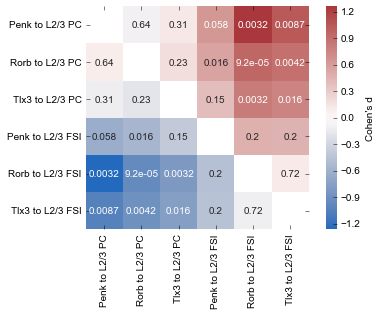

In [62]:
args=[l for l in rise_master]
print (stats.kruskal(*args))
out_array=np.zeros([6,6])
y_array=range(6)
x_array=range(6)
i=0
for y in y_array:
    x_array=range(0,6)
    for x in x_array:
        #print cnx_classes[y], cnx_classes[x]
        d=Cohens_d(args[x],args[y])
        #print d
        out_array[x,y]=d
    i+=1
    
out_array[out_array == 0] ='nan'
exc_dunn_rise=sp.posthoc_dunn(args,p_adjust='fdr_bh')
sns.heatmap(np.transpose(out_array),cmap='vlag',square=True, annot=exc_dunn_rise, cbar_kws={'label': "Cohen's d"})
plt.xticks([0.5,1.5,2.5,3.5,4.5,5.5], cnx_classes, rotation='vertical')
plt.yticks([0.5,1.5,2.5,3.5,4.5,5.5], cnx_classes, rotation='horizontal')
#plt.savefig('exc_rise_comparison_table.svg')

In [64]:
cnx_classes=['Pvalb to L2/3 PC', 'Sst to L2/3 PC',  'Pvalb to L2/3 Pvalb','Sst to L2/3 FSI']
measures=['amp. median', 'amp. mean', 'amp. sd', 'skew', 'CV', 'rise2080']
Pvalb_Pvalb_sub=Pvalb_Pvalb[Pvalb_Pvalb.xyz_dist>100]
df_list=[Pvalb_L23pyr,Sst_L23pyr,Pvalb_Pvalb_sub,Sst_L23fsi]
i=0
amp_master=[]
rise_master=[]
summary_table=np.zeros([len(cnx_classes),len(measures)])
for df in df_list:
    inh_cnxs=df[df.cnx=='inhibitory']
    inh_cnxs=inh_cnxs.dropna(subset=['peakOfAvg'])
    class_name=cnx_classes[i]
    
    median=np.median(inh_cnxs.peakOfAvg*-1)
    mean=np.mean(inh_cnxs.peakOfAvg*-1)
    sd=np.std(inh_cnxs.peakOfAvg*-1)
    n=len(inh_cnxs.peakOfAvg)
    skew=stats.skew(inh_cnxs.peakOfAvg*-1)
    CV=np.nanmean(inh_cnxs.CV)
    rise=np.nanmean(inh_cnxs.rise2080)
    print (class_name, median, mean ,sd, skew,CV,rise)
    #print stats.skewtest(inh_cnxs.peakOfAvg)
    summary_table[i,:]=np.array([median, mean, sd, skew,CV,rise])
    amp_master.append(np.array(inh_cnxs.peakOfAvg*-1))
    inh_cnxs_rise=inh_cnxs.dropna(subset=['rise2080'])
    rise_master.append(np.array(inh_cnxs_rise.rise2080))
    i+=1

Pvalb to L2/3 PC 0.27224353 0.4066836534675325 0.44533027803224023 1.9694496954275302 0.5849427918181819 2.9804102412987015
Sst to L2/3 PC 0.11460514 0.15968361426543207 0.12729008641993256 2.3504668055929354 0.8494139724691359 4.027286719135803
Pvalb to L2/3 Pvalb 0.15507073999999993 0.22098735596428568 0.18831560270146205 2.5472037579825466 0.7616326335714287 2.1017170464285715
Sst to L2/3 FSI 0.194480255 0.33799078427777773 0.4207139294598545 2.3841976129283746 0.751002473888889 2.726183394444445


In [65]:
args=[l for l in amp_master]
stats.kruskal(*args)

KruskalResult(statistic=30.18137868393046, pvalue=1.2639814212761591e-06)

In [66]:
args=[l for l in rise_master]
stats.kruskal(*args)

KruskalResult(statistic=41.793097339190126, pvalue=4.438931766124997e-09)

In [67]:
out_array=np.zeros([4,4])
y_array=range(4)
x_array=range(4)
i=0
for y in y_array:
    x_array=range(0,4)
    for x in x_array:
        
        d=Cohens_d(args[x],args[y])
        out_array[x,y]=d
    i+=1

In [68]:
inh_dunn=sp.posthoc_dunn(args,p_adjust='fdr_bh')
inh_dunn

,1,2,3,4
1,1.000000,5.612595e-04,4.776047e-03,0.771579
2,0.000561,1.000000e+00,3.941899e-08,0.025462
3,0.004776,3.941899e-08,1.000000e+00,0.059018
4,0.771579,2.546237e-02,5.901849e-02,1.000000


([<matplotlib.axis.YTick at 0x7f99bd6b29a0>,
 [Text(0, 0.5, 'Pvalb to L2/3 PC'),
  Text(0, 1.5, 'Sst to L2/3 PC'),
  Text(0, 2.5, 'Pvalb to L2/3 Pvalb'),
  Text(0, 3.5, 'Sst to L2/3 FSI')])

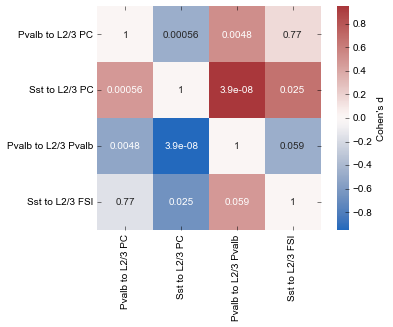

In [69]:

sns.heatmap(np.transpose(out_array),cmap='vlag',square=True, annot=inh_dunn, cbar_kws={'label': "Cohen's d"})
plt.xticks([0.5,1.5,2.5,3.5], cnx_classes, rotation='vertical')
plt.yticks([0.5,1.5,2.5,3.5], cnx_classes, rotation='horizontal')
#plt.savefig('inh_amp_comparison_table.svg')

([<matplotlib.axis.YTick at 0x7f99be149130>,
 [Text(0, 0.5, 'Pvalb to L2/3 PC'),
  Text(0, 1.5, 'Sst to L2/3 PC'),
  Text(0, 2.5, 'Pvalb to L2/3 Pvalb'),
  Text(0, 3.5, 'Sst to L2/3 FSI')])

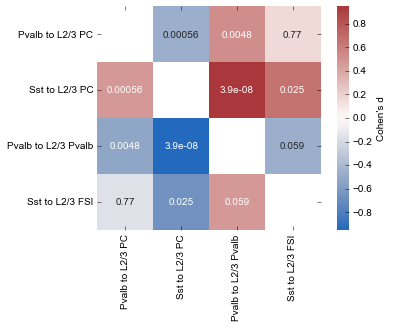

In [70]:
args=[l for l in rise_master]
stats.kruskal(*args)
out_array=np.zeros([4,4])
y_array=range(4)
x_array=range(4)
i=0
for y in y_array:
    x_array=range(0,4)
    for x in x_array:
        
        d=Cohens_d(args[x],args[y])
        
        out_array[x,y]=d
    i+=1
    
out_array[out_array == 0] ='nan'
inh_dunn_rise=sp.posthoc_dunn(args,p_adjust='fdr_bh')
sns.heatmap(np.transpose(out_array),cmap='vlag',square=True, annot=inh_dunn_rise, cbar_kws={'label': "Cohen's d"})
plt.xticks([0.5,1.5,2.5,3.5], cnx_classes, rotation='vertical')
plt.yticks([0.5,1.5,2.5,3.5], cnx_classes, rotation='horizontal')
#plt.savefig('inh_rise_comparison_table.svg')

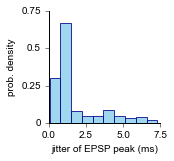

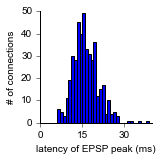

In [71]:
df=standard_df
df=df[df.cnx=='excitatory']
df=df.dropna(subset=['jitter'])
fig, ax= plt.subplots()
ax.hist(df.jitter,edgecolor='darkblue',facecolor='skyblue',alpha=0.8,density=True)
ax.set_xlabel('jitter of EPSP peak (ms)')
ax.set_ylabel('prob. density')
ax.tick_params(axis='both', which='both', labelsize=10, direction='out')
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_major_formatter(FormatStrFormatter('%g'))
ax.xaxis.set_major_locator(plt.MaxNLocator(3))
ax.yaxis.set_major_locator(plt.MaxNLocator(3))
ax.axes.xaxis.set_visible(True)

fig.set_figheight(2)
fig.set_figwidth(2)
#plt.savefig('EPSP_jitter_hist.svg')
plt.show()

fig, ax = plt.subplots()
bins=np.arange(0,45,1)
ax.hist(df.timeOfPeak,bins=bins)
ax.set_xlabel('latency of EPSP peak (ms)')
ax.set_ylabel('# of connections')
ax.tick_params(axis='both', which='both', labelsize=10, direction='out')
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_major_formatter(FormatStrFormatter('%g'))
ax.xaxis.set_major_locator(plt.MaxNLocator(3))
ax.axes.xaxis.set_visible(True)
ax.set_xlim(0,40)
fig.set_figheight(2)
fig.set_figwidth(2)
#plt.savefig('EPSP_latency_hist.svg')
plt.show()
